<a href="https://colab.research.google.com/github/corrine1106/Project_HW/blob/main/%EF%BC%B73_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-13 07:15:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.45.110, 2607:f8b0:4004:83f::200e
Connecting to drive.google.com (drive.google.com)|142.251.45.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f9e6elh7khvgrs6k803j2p7u29jnrd9o/1639379700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-13 07:15:07--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f9e6elh7khvgrs6k803j2p7u29jnrd9o/1639379700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.13.65, 2607:f8b0:4004:808::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.13.65|:4

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/T大使/data3_project (1).csv')

In [6]:
def transfer_revernue(row):
  if (row['Quantity'] < 0) & (row['UnitPrice']<0):
    return row['Quantity']*-row['UnitPrice']
  else:
    return row['Quantity']*row['UnitPrice']

df['Revenue'] = df.apply(transfer_revernue,axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.0,2019-01-01,1259.0,9.100002e+12,中區,2019-12-09,2018-06-24,10072.0
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.0,2019-01-01,839.0,9.100003e+12,中區,2018-10-21,2018-10-21,6712.0
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.0,2019-01-01,839.0,9.100003e+12,中區,2018-10-21,2018-10-21,6712.0
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.0,2019-01-01,-1501.0,9.100003e+12,中區,2018-10-21,2018-10-21,-12008.0
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.0,2019-01-01,672.0,9.100003e+12,南區,2018-12-04,2018-12-04,5376.0


In [7]:
# 1.每個區域的收入分佈圖
area_group = df.groupby('Country')['Revenue'].sum().reset_index()
area_group['Country'] = area_group['Country'].astype(str)

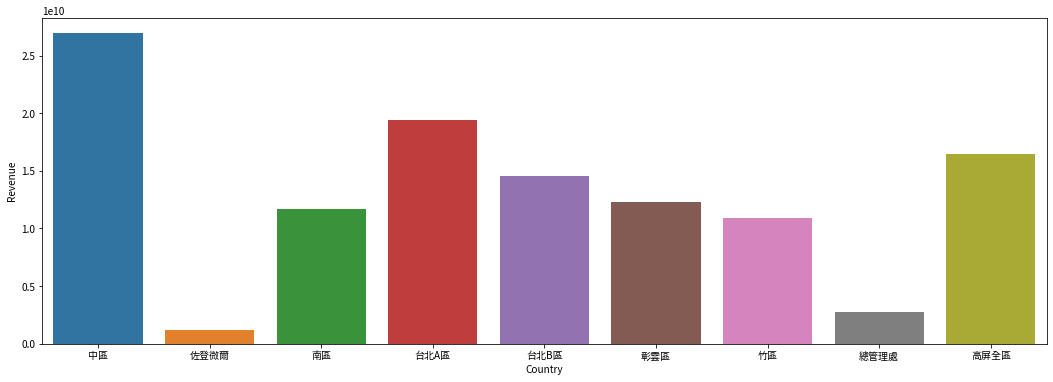

In [8]:
figure,axis = plt.subplots(figsize=(18,6))
sns.barplot(ax=axis, x='Country', y='Revenue',data=area_group)
plt.show()

In [9]:
# 2.銷售最好的在每個地區的收入分佈
best_goods = df.groupby('StockCode')['Revenue'].sum().idxmax()
goods_selected = df.loc[df['StockCode'] == best_goods]

In [10]:
goods_selected

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
80435,PS5329001874,HB95A01,全身健康優化SPA課程單堂,8.0,2019-02-28,985.0,9.100002e+12,中區,2014-03-04,2014-03-04,7880.0
80438,PS5329001875,HB95A01,全身健康優化SPA課程單堂,8.0,2019-02-28,985.0,9.100000e+12,中區,2002-11-11,2012-08-09,7880.0
80487,PS5330018753,HB95A01,全身健康優化SPA課程單堂,8.0,2019-02-28,985.0,9.100000e+12,中區,2001-08-01,2012-08-07,7880.0
82483,PS5553016468,HB95A01,全身健康優化SPA課程單堂,8.0,2019-03-01,985.0,9.100001e+12,高屏全區,2012-10-31,2012-10-31,7880.0
82485,PS5553016469,HB95A01,全身健康優化SPA課程單堂,8.0,2019-03-01,985.0,9.100000e+12,高屏全區,2005-01-24,2012-11-06,7880.0
...,...,...,...,...,...,...,...,...,...,...,...
1403583,PS5117030690,HB95A01,全身健康優化SPA課程單堂,16.0,2020-12-31,3659.0,9.100003e+12,台北B區,2018-11-08,2018-11-08,58544.0
1403943,PS5444012976,HB95A01,全身健康優化SPA課程單堂,16.0,2020-12-31,3659.0,9.100002e+12,南區,2015-12-19,2015-12-19,58544.0
1404016,PS5441025945,HB95A01,全身健康優化SPA課程單堂,16.0,2020-12-31,3659.0,9.100001e+12,南區,2006-07-21,2012-12-19,58544.0
1404117,PS5360027480,HB95A01,全身健康優化SPA課程單堂,88.0,2020-12-31,18859.0,9.100000e+12,彰雲區,2005-03-10,2012-10-06,1659592.0


In [11]:
selected_group = goods_selected.groupby('Country')['Revenue'].sum().reset_index()
selected_group['Country'] = selected_group['Country'].astype(str)

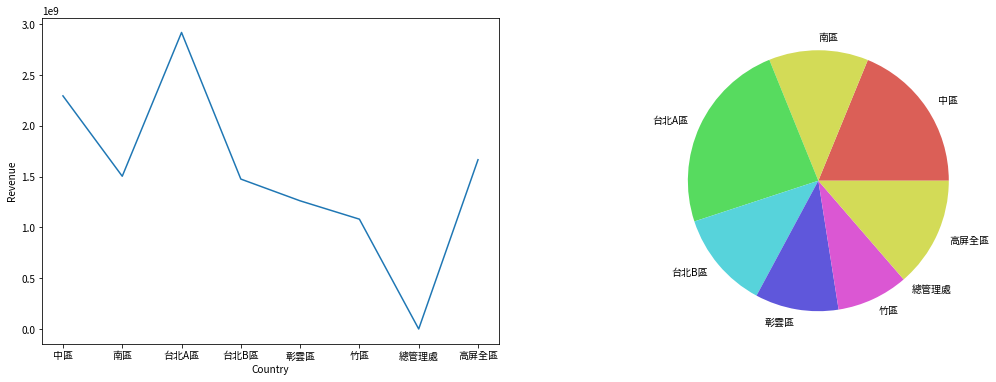

In [12]:
figure,axis = plt.subplots(1,2,figsize=(18,6))
sns.lineplot(ax=axis[0], x='Country', y='Revenue',data=selected_group)
hls_default_palette = sns.hls_palette()
plt.pie(selected_group['Revenue'], labels = selected_group['Country'], colors = hls_default_palette) 
plt.show()

In [13]:
# 3.每個季節購買的人數與收入（折線圖）
season = {3:'春',4:'春',5:'春',6:'夏',7:'夏',8:'夏',9:'秋',10:'秋',11:'秋',12:'冬',1:'冬',2:'冬'}
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['season'] = df['InvoiceDate'].apply(lambda date: season[date.month])
season_group = df.groupby('season')['Revenue'].sum().reset_index()
season_group.set_index('season',inplace=True)
season_group['Number'] = df.groupby('season')['InvoiceNo'].nunique()

In [14]:
season_group['Revenue'] = season_group['Revenue']/100000

In [15]:
season_group

,Revenue,Number
season,,
冬,288324.08464,134749
夏,287949.72824,159982
春,289823.66792,167744
秋,296168.17544,154010


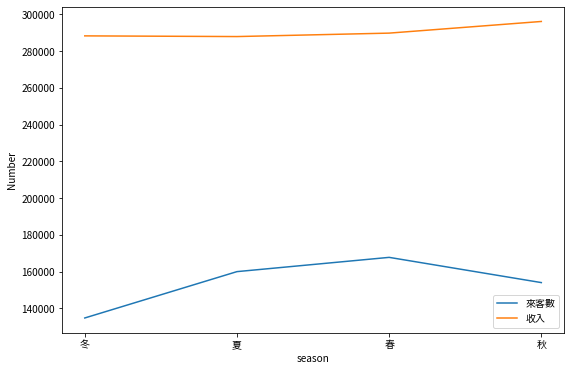

In [16]:
figure,axis = plt.subplots(figsize=(9,6))
sns.lineplot(ax=axis, x='season', y='Number',data=season_group,label='來客數')
sns.lineplot(ax=axis, x='season', y='Revenue',data=season_group, label='收入') 
axis.legend()
plt.show()